# Exploratory Data Analysis - Medical Cost Personal Dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## initial visualization on data

In [18]:
df = pd.read_csv("insurance.csv")

print(df.info())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.09818

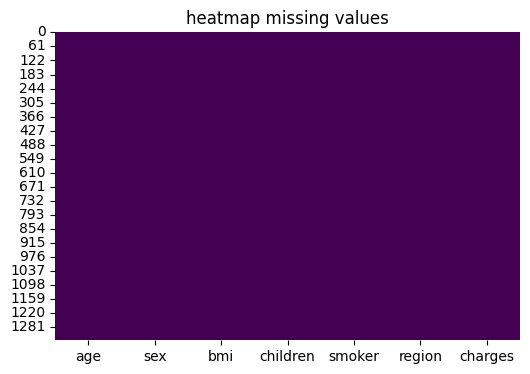

missing values per kolom:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [19]:
#cek missing values
plt.figure(figsize=(6,4))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("heatmap missing values")
plt.show()

print("missing values per kolom:")
print(df.isna().sum())


no missing value detected

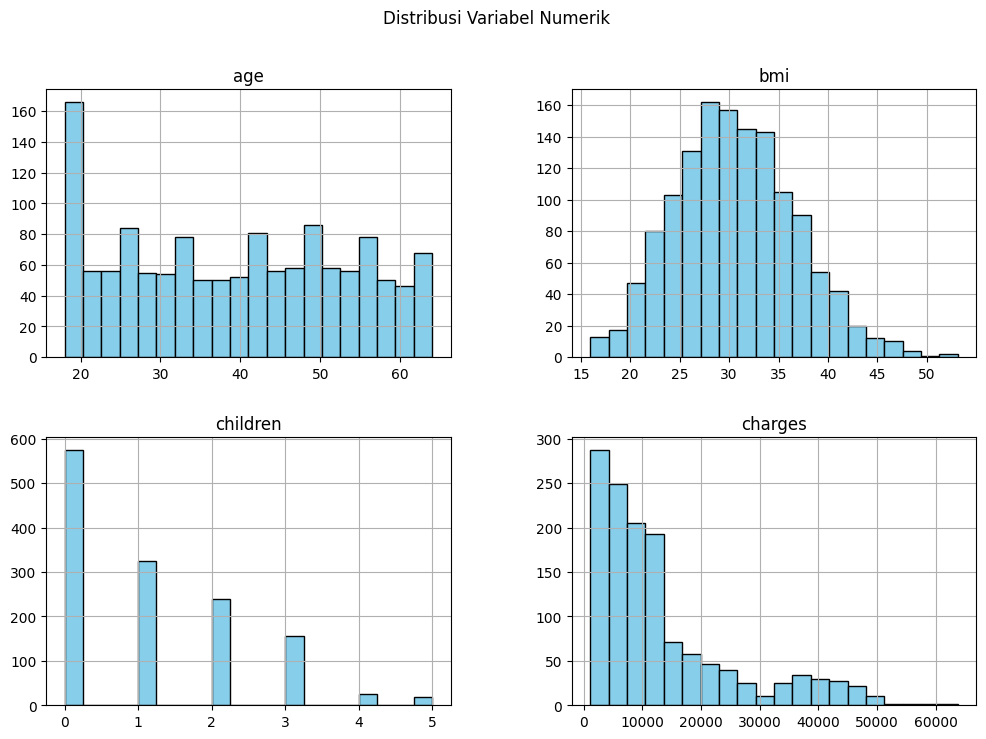

In [20]:
# Distribusi numerical
num_cols = ["age", "bmi", "children", "charges"]
df[num_cols].hist(bins=20, figsize=(12,8), color="skyblue", edgecolor="black")
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

A. Age Usia
cukup merata, ada puncak signifikan di kelompok usia 20-an awal. Artinya, pasien muda lebih dominan dalam dataset ini dibanding kelompok usia lanjut. Seiring bertambahnya usia, jumlah pasien relatif menurun, meskipun masih cukup seimbang di rentang 30–50 tahun

B. BMI
berbentuk mendekati normal (bell shaped) dengan rata-rata di sekitar 30. Hal ini menunjukkan bahwa sebagian besar pasien berada dalam kategori overweight hingga obese, sesuai definisi WHO. Sementara, hanya sedikit pasien dengan BMI ekstrem (sangat rendah atau sangat tinggi).

C. Children 
sebagian besar pasien tidak memiliki anak (nilai 0 dominan). Jumlah anak semakin besar semakin jarang ditemukan. 

D. Charges
biaya medis sangat right-skewed. Mayoritas pasien dikenakan biaya rendah hingga menengah, namun terdapat beberapa kasus dengan biaya sangat tinggi. Ini menandakan adanya outlier alami di data, yang kemungkinan besar berkaitan dengan kasus medis serius, rawat inap lama, atau penyakit kronis.

C:\Users\USER\AppData\Local\Temp\ipykernel_12048\4230295022.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


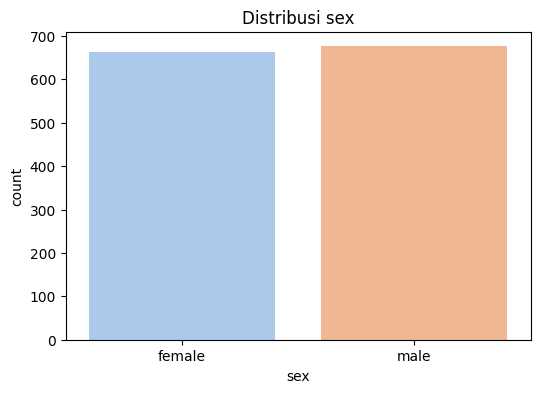

C:\Users\USER\AppData\Local\Temp\ipykernel_12048\4230295022.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


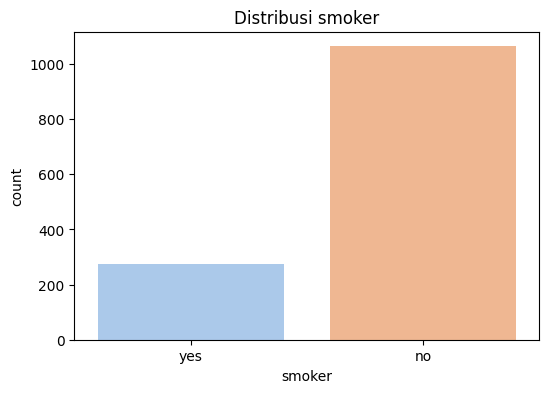

C:\Users\USER\AppData\Local\Temp\ipykernel_12048\4230295022.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


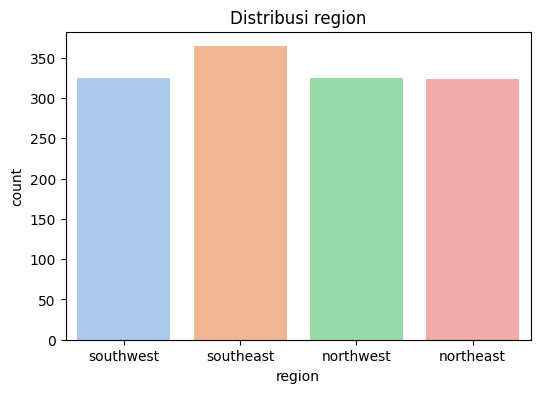

In [21]:
# Distribusi categorical
cat_cols = ["sex", "smoker", "region"]
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], palette="pastel")
    plt.title(f"Distribusi {col}")
    plt.show()


A. Sex 
distribusi pasien antara laki-laki dan perempuan hampir seimbang.

B. Smoker 
mayoritas pasien adalah non-smoker, walaupun sedikit, kelompok perokok ini biasanya akan menjadi variabel yang sangat berpengaruh terhadap berkorelasi antar variabelnya.

C. Region 
distribusi pasien berdasarkan region cukup merata. Bisa cb diuji apakah ada variasi biaya medis antar wilayah.

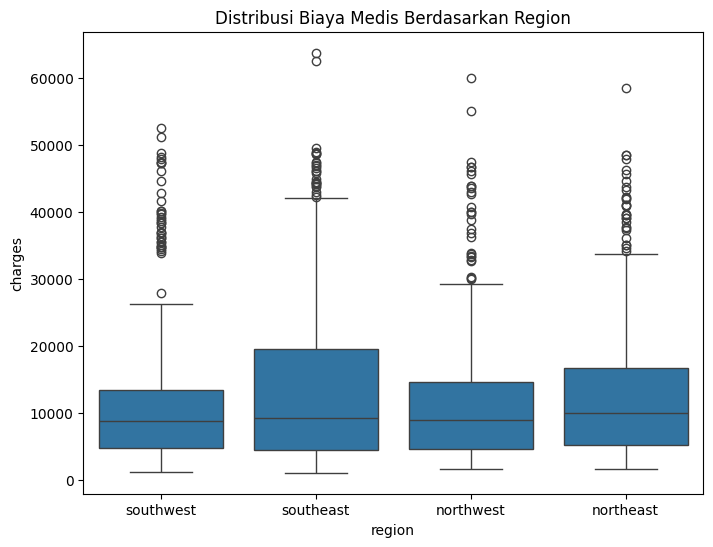

ANOVA F-statistic: 2.96962669358912
p-value: 0.0308933560705201


In [22]:
import scipy.stats as stats

# Boxplot distribusi biaya per wilayah
plt.figure(figsize=(8,6))
sns.boxplot(x="region", y="charges", data=df)
plt.title("Distribusi Biaya Medis Berdasarkan Region")
plt.show()

# ANOVA: apakah rata-rata charges berbeda signifikan antar region
anova = stats.f_oneway(
    df[df['region'] == 'northeast']['charges'],
    df[df['region'] == 'northwest']['charges'],
    df[df['region'] == 'southeast']['charges'],
    df[df['region'] == 'southwest']['charges']
)

print("ANOVA F-statistic:", anova.statistic)
print("p-value:", anova.pvalue)


Dari boxplot kelihatan distribusi biaya medis antar region relatif mirip, tapi ada indikasi region tertentu (2) median dan sebarannya agak beda.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
#ngubah yg 'object' biar data bisa diproses

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


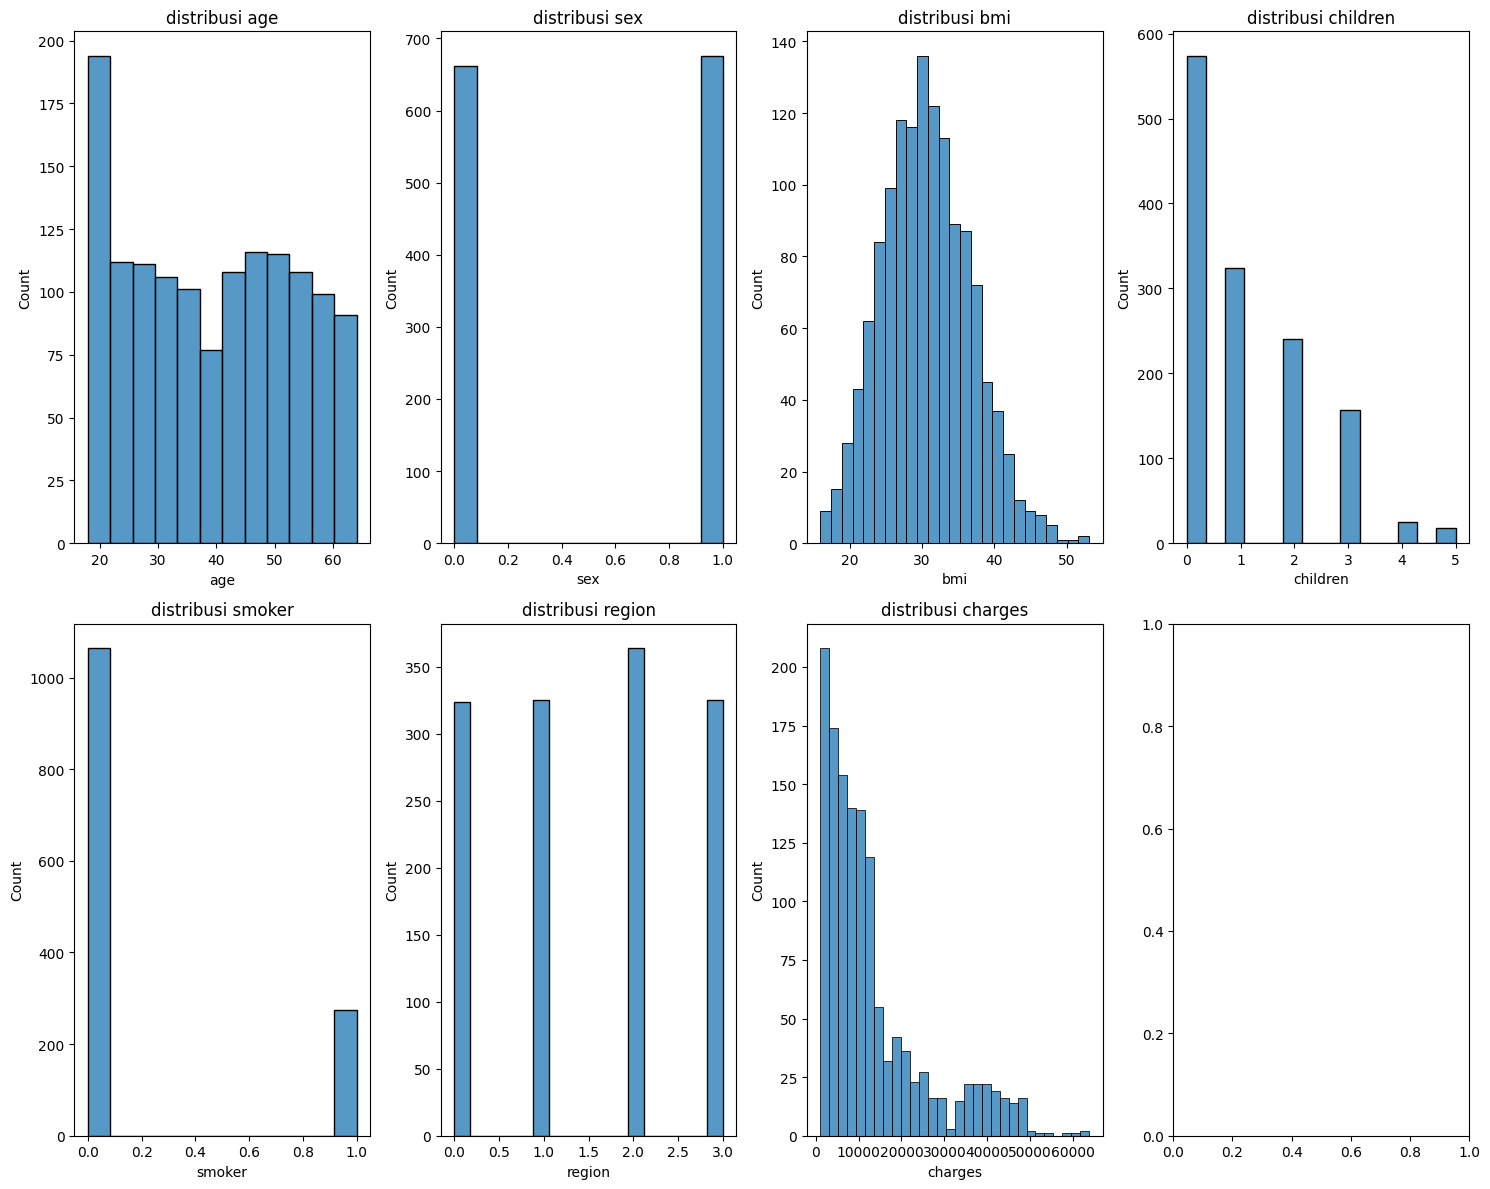

In [25]:
numCols = df.select_dtypes(include=["int64", "float64"]).columns

#buat ukuran display
nrows, ncols = 2, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numCols[:nrows * ncols]):  
    sns.histplot(df[col], kde=False, ax=axes[i])
    axes[i].set_title(f"distribusi {col}")

plt.tight_layout()
plt.show()


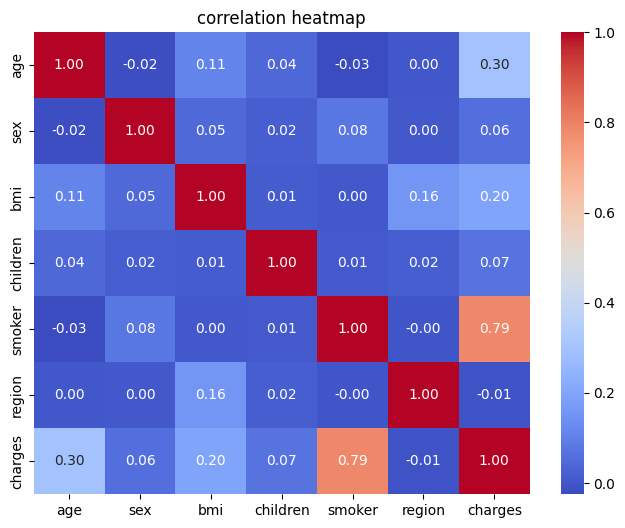

In [26]:
#heatmap antar variabel 
numCols = df.select_dtypes(include=["int64", "float64"]).columns


plt.figure(figsize=(8,6))
corr = df[numCols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation heatmap")
plt.show()

Dari hasil analisis korelasi, status perokok merupakan faktor paling dominan yang menentukan tingginya biaya medis. Variabel usia dan BMI juga berkontribusi, meskipun dalam skala lebih kecil. Sementara faktor seperti jenis kelamin, jumlah anak, dan wilayah hampir tidak berpengaruh terhadap biaya.

In [27]:
df.to_csv('cleanedData.csv', index=False)